# Time series analysis in-class exercises

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

# One of the modules reports prodigious warnings so we will just hide these ;)
import warnings
warnings.filterwarnings("ignore")

Start with a basic time series, only including a trend

In [4]:
time = np.arange(144)
trend = time * 2.65 +100 # y = mx + b
trend

array([100.  , 102.65, 105.3 , 107.95, 110.6 , 113.25, 115.9 , 118.55,
       121.2 , 123.85, 126.5 , 129.15, 131.8 , 134.45, 137.1 , 139.75,
       142.4 , 145.05, 147.7 , 150.35, 153.  , 155.65, 158.3 , 160.95,
       163.6 , 166.25, 168.9 , 171.55, 174.2 , 176.85, 179.5 , 182.15,
       184.8 , 187.45, 190.1 , 192.75, 195.4 , 198.05, 200.7 , 203.35,
       206.  , 208.65, 211.3 , 213.95, 216.6 , 219.25, 221.9 , 224.55,
       227.2 , 229.85, 232.5 , 235.15, 237.8 , 240.45, 243.1 , 245.75,
       248.4 , 251.05, 253.7 , 256.35, 259.  , 261.65, 264.3 , 266.95,
       269.6 , 272.25, 274.9 , 277.55, 280.2 , 282.85, 285.5 , 288.15,
       290.8 , 293.45, 296.1 , 298.75, 301.4 , 304.05, 306.7 , 309.35,
       312.  , 314.65, 317.3 , 319.95, 322.6 , 325.25, 327.9 , 330.55,
       333.2 , 335.85, 338.5 , 341.15, 343.8 , 346.45, 349.1 , 351.75,
       354.4 , 357.05, 359.7 , 362.35, 365.  , 367.65, 370.3 , 372.95,
       375.6 , 378.25, 380.9 , 383.55, 386.2 , 388.85, 391.5 , 394.15,
      

This is a time series, but it's boring

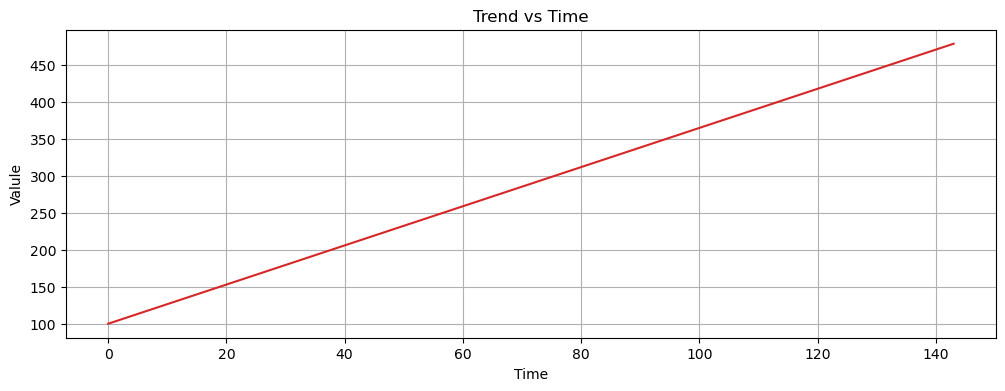

In [5]:
plt.figure(figsize=(12, 4))

plt.plot(time, trend, color='tab:red')
plt.xlabel("Time")
plt.ylabel("Valule")
plt.grid()
plt.title("Trend vs Time");

Add seasonality using a trig function:

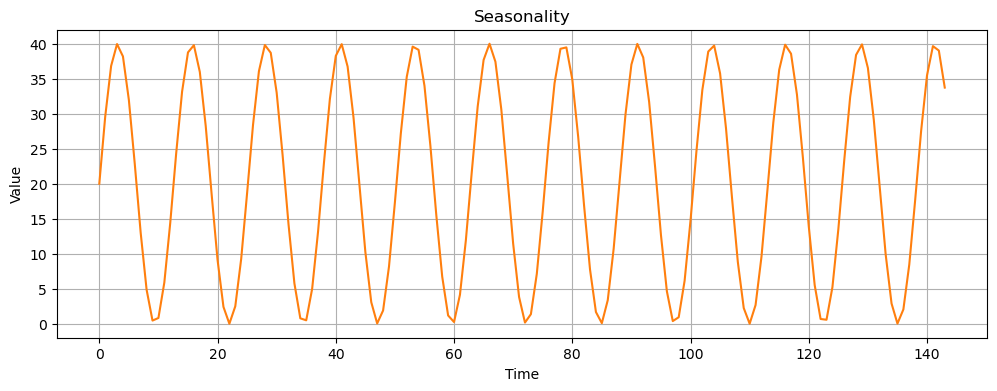

In [6]:
seasonal = 20 + np.sin( time * 0.5) * 20

plt.figure(figsize=(12, 4))

plt.plot(time, seasonal, color='tab:orange')
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.title("Seasonality");

Make residuals (noise):

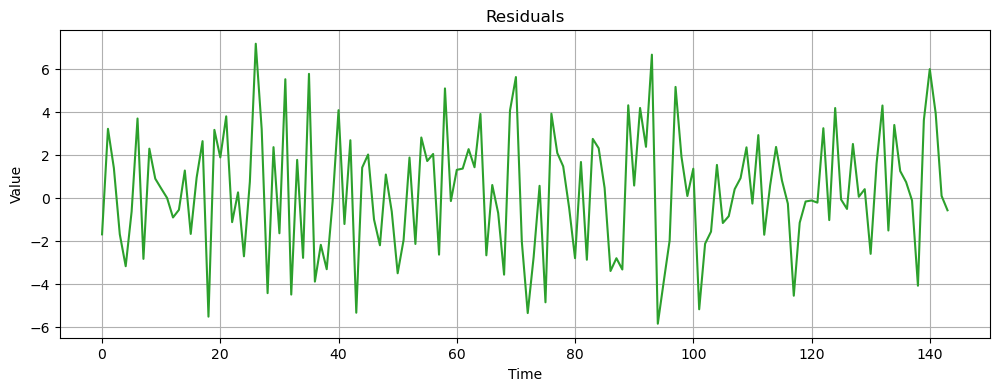

In [7]:
residuals = np.random.normal(loc=0.0, scale=3, size=len(time))

plt.figure(figsize=(12, 4))

plt.plot(time, residuals, color='tab:green')
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.title("Residuals");

Now make an additive model with f(x) = trend(x) + seasonality(x) + residuals(x)

In [8]:
additive = trend + seasonal + residuals

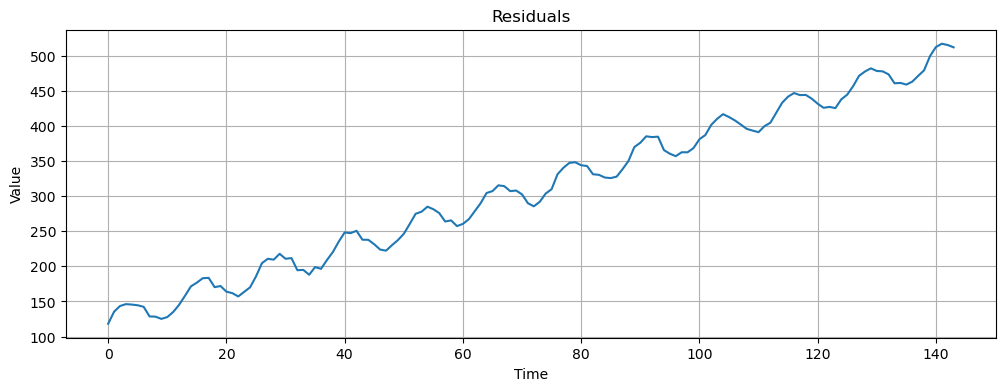

In [9]:
plt.figure(figsize=(12, 4))

plt.plot(time, additive, color='tab:blue')
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.title("Residuals");

Now, make it a multiplicative model (residuals are commented out because they do weird things to the plot. You could add them instead of multiplying them if you wanted):

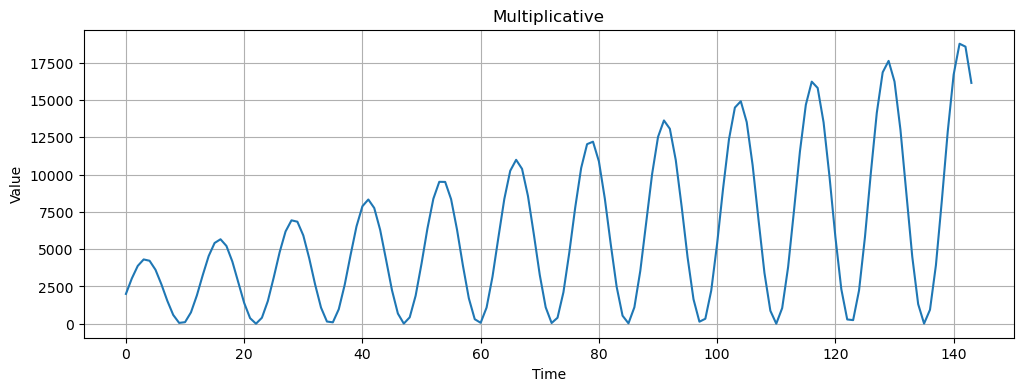

In [10]:
multiplicative = trend * seasonal # * np.abs(residuals) # <- Plotting w/o residuals to show the pattern

plt.figure(figsize=(12, 4))

plt.plot(time, multiplicative, color='tab:blue')
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid()
plt.title("Multiplicative");

## Decomposing a time series
In practice, we are usually decomposing time series to determine the trend, periodicity, and/or noise.

In [11]:
slope, intercept = np.polyfit(np.arange(len(additive)), additive, 1) # estimate line coefficient

trend = np.arange(len(additive)) * slope + intercept # linear trend

detrended = additive - trend # remove the trend

By subtracting the trend (orange) from the time series (blue), we can see just the periodicity and residuals (green).

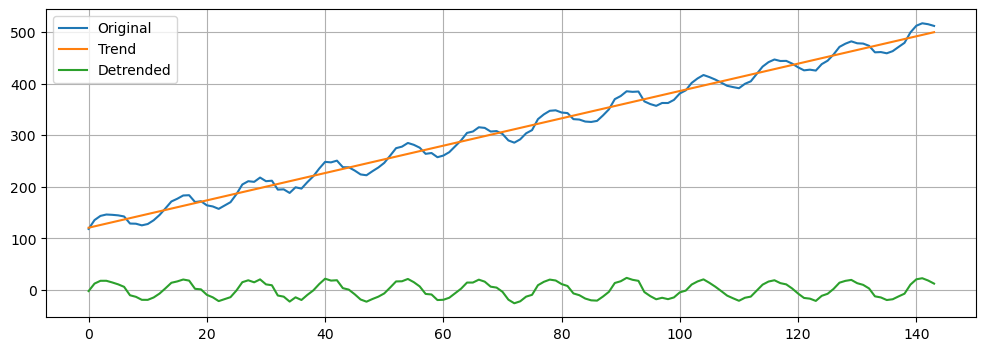

In [12]:
plt.figure(figsize=(12, 4))
plt.plot(additive, label='Original')
plt.plot(trend, label='Trend')
plt.plot(detrended, label='Detrended')
plt.grid()
plt.legend();

### Additive and multiplicative decomposistion
For the `seasonal_decompose` function to work, we need to tell it that the model is additive. Be aware that here, we've named our model `additive` as well, but this is a variable, while the model parameter is a function built-in.

In [13]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=12)

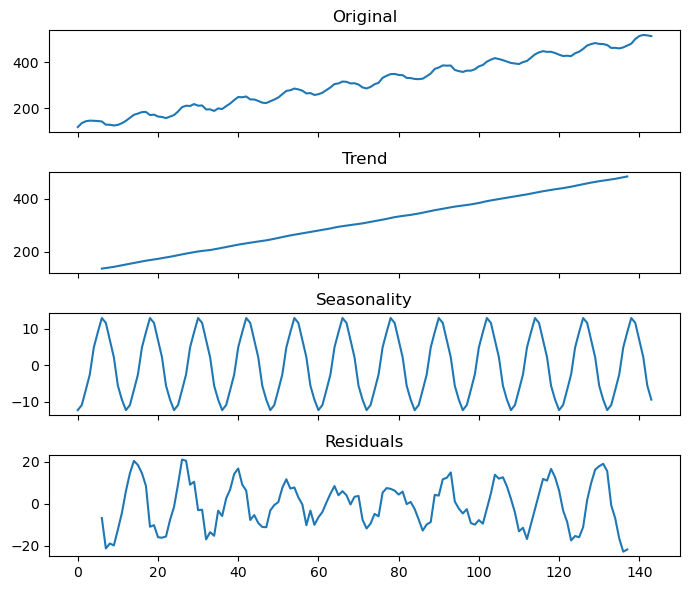

In [14]:
# A helper function to plot the original time series, and the 3 decomposed components
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 6))
    axes[0].plot(original)
    axes[0].set_title('Original')
    axes[1].plot(decomposition.trend)
    axes[1].set_title('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_title('Seasonality')
    axes[3].plot(decomposition.resid)
    axes[3].set_title('Residuals')
    plt.tight_layout()
    plt.show()
seas_decomp_plots(additive, additive_decomposition)

Messing around with period values:

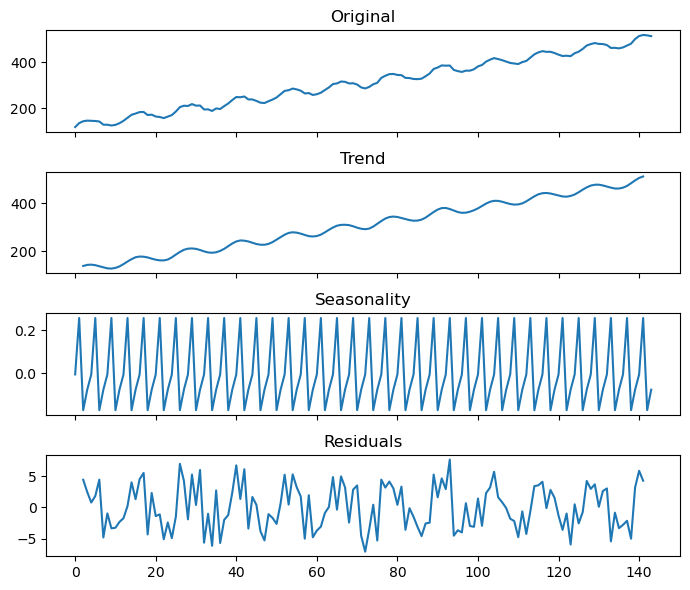

In [31]:
additive_decomposition = seasonal_decompose(x=additive, model='additive', period=4)

# A helper function to plot the original time series, and the 3 decomposed components
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 6))
    axes[0].plot(original)
    axes[0].set_title('Original')
    axes[1].plot(decomposition.trend)
    axes[1].set_title('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_title('Seasonality')
    axes[3].plot(decomposition.resid)
    axes[3].set_title('Residuals')
    plt.tight_layout()
    plt.show()
seas_decomp_plots(additive, additive_decomposition)

Trying it with the multiplicative series:

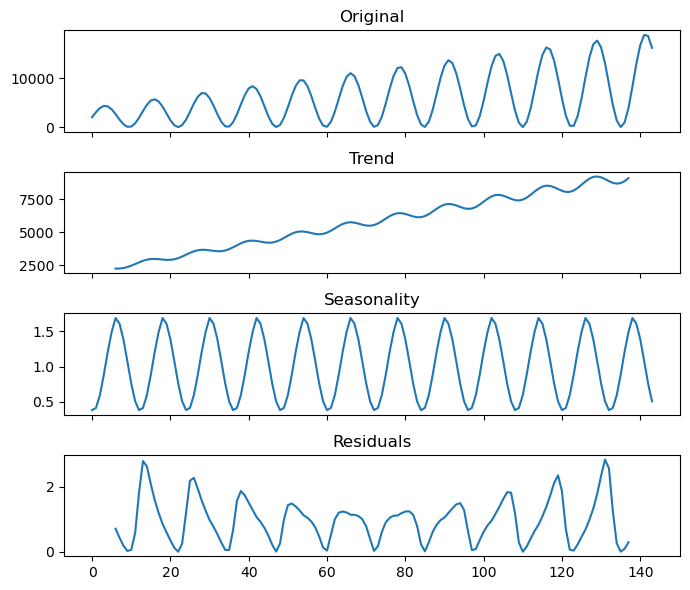

In [41]:
multiplicative_decomposition = seasonal_decompose(x=multiplicative, model='multiplicative', period=12)
#changing the period to 13 looks better for trend? but worse for residuals...

# A helper function to plot the original time series, and the 3 decomposed components
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 6))
    axes[0].plot(original)
    axes[0].set_title('Original')
    axes[1].plot(decomposition.trend)
    axes[1].set_title('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_title('Seasonality')
    axes[3].plot(decomposition.resid)
    axes[3].set_title('Residuals')
    plt.tight_layout()
    plt.show()
seas_decomp_plots(multiplicative, multiplicative_decomposition)

Apply the wrong model to the wrong series:

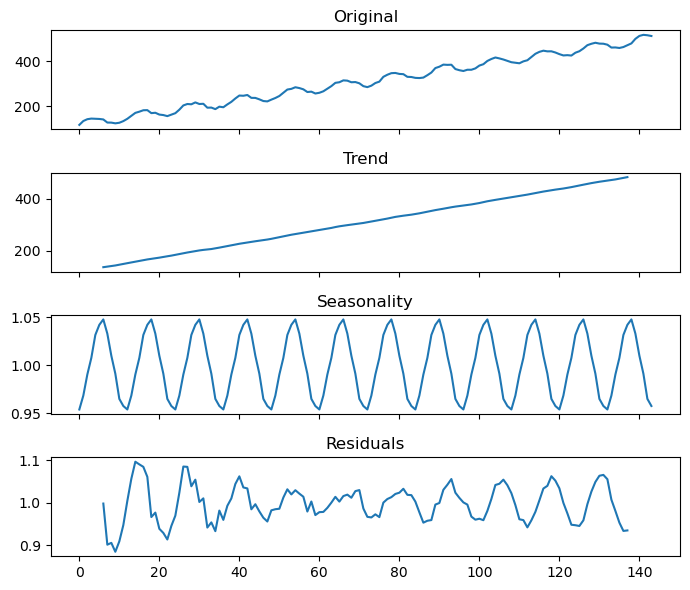

In [42]:
# applying multiplicative decompositions to additive model
a_m_decomposition = seasonal_decompose(x=additive, model='multiplicative', period=12)

# A helper function to plot the original time series, and the 3 decomposed components
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 6))
    axes[0].plot(original)
    axes[0].set_title('Original')
    axes[1].plot(decomposition.trend)
    axes[1].set_title('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_title('Seasonality')
    axes[3].plot(decomposition.resid)
    axes[3].set_title('Residuals')
    plt.tight_layout()
    plt.show()
seas_decomp_plots(additive, a_m_decomposition)

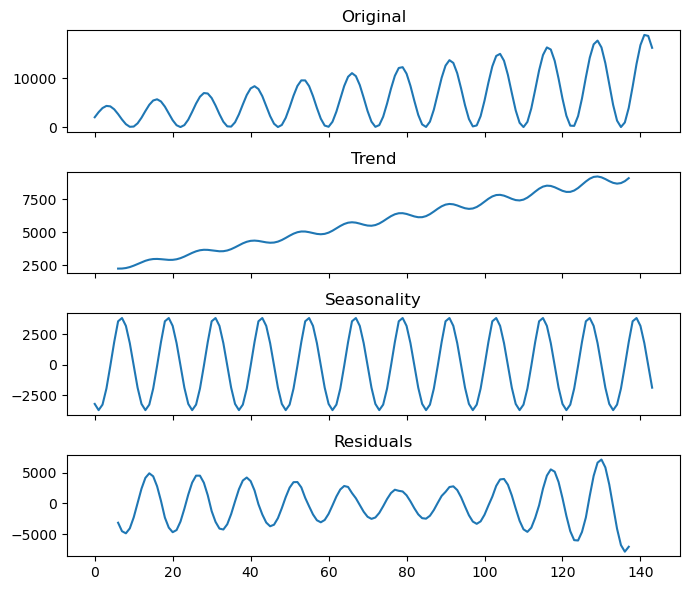

In [43]:
# applying additive decompositions to multiplicative model
m_a_decomposition = seasonal_decompose(x=multiplicative, model='additive', period=12)

# A helper function to plot the original time series, and the 3 decomposed components
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 6))
    axes[0].plot(original)
    axes[0].set_title('Original')
    axes[1].plot(decomposition.trend)
    axes[1].set_title('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_title('Seasonality')
    axes[3].plot(decomposition.resid)
    axes[3].set_title('Residuals')
    plt.tight_layout()
    plt.show()
seas_decomp_plots(multiplicative, m_a_decomposition)

## Forecasting with auto regressive integrated moving average (ARIMA)

In [44]:
## Get the length of our input time series
max_x = additive.shape[-1]
max_x

144

Split training and testing data:

Text(0.5, 0, 'Time')

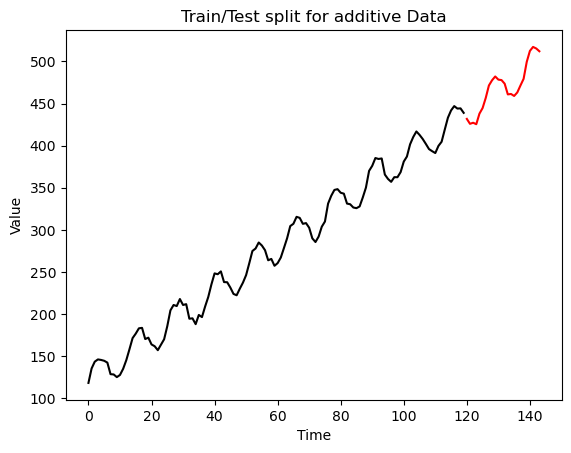

In [45]:
# We'll split at index 120, which will leave 24 timepoints to predict in the train set
split_idx = 120

# For plotting we need x-coords for the full dataset so make a list of [1, 2, .., max_x]
xs = list(range(max_x))

# Split the train data and the x-coords
train = additive[:split_idx]
xs_train = xs[:split_idx]

# Split the test data and the remaining x-coords
test = additive[split_idx:]
xs_test = xs[split_idx:]

# Plot the test and train data to see the 'truth' value of the test set
plt.plot(xs_train, train, color = "black")
plt.plot(xs_test, test, color = "red")
plt.title("Train/Test split for additive Data")
plt.ylabel("Value")
plt.xlabel("Time")

Fit the model to make predictions:

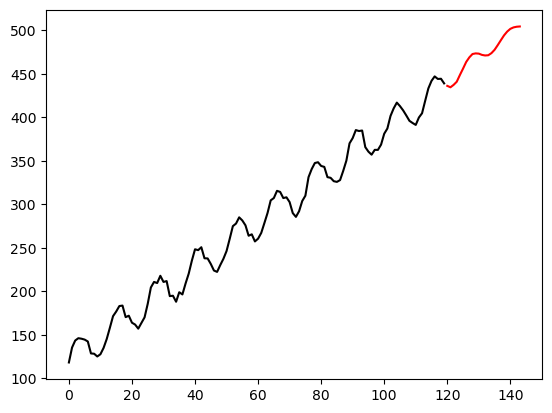

In [51]:
from pmdarima.arima import auto_arima

# Train the model on the training data
model = auto_arima(train)
model.fit(train)

# Predict the next n timepoints corresponding to the length of the test set
forecast = model.predict(n_periods=len(test))

# Plot the results
plt.plot(xs_train, train, color = "black")
plt.plot(xs_test, forecast, color = "red")

Choosing a larger value for training, and testing continued prediction accuracy:

In [57]:
# Lets say you want to predict 100 timepoints in the future you can
# update the xs_test x-coords like this
new_test = 100
xs_test = list(range(split_idx, split_idx + new_test))

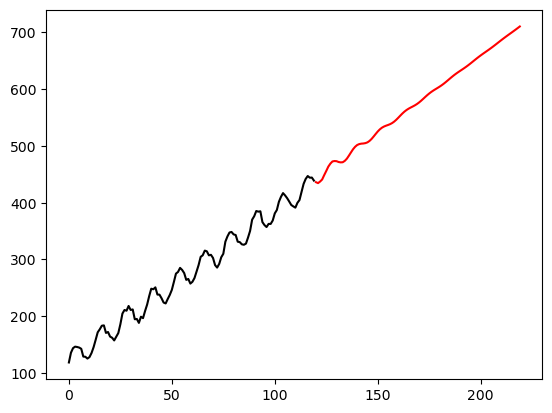

In [58]:
# Predict the next n timepoints corresponding to the length of the test set
forecast = model.predict(n_periods=len(xs_test))

# Plot the results
plt.plot(xs_train, train, color = "black") # <- unchanged
plt.plot(xs_test, forecast, color = "red") # <- set new values for xs_test & forecast

## Practice with built-in data

In [59]:
import statsmodels.api as smf
ts_A = sm.datasets.get_rdataset("AirPassengers", "datasets").data["value"].values
print(len(ts_A))
ts_B = sm.datasets.get_rdataset("co2", "datasets").data["value"].values
print(len(ts_B))

144
468


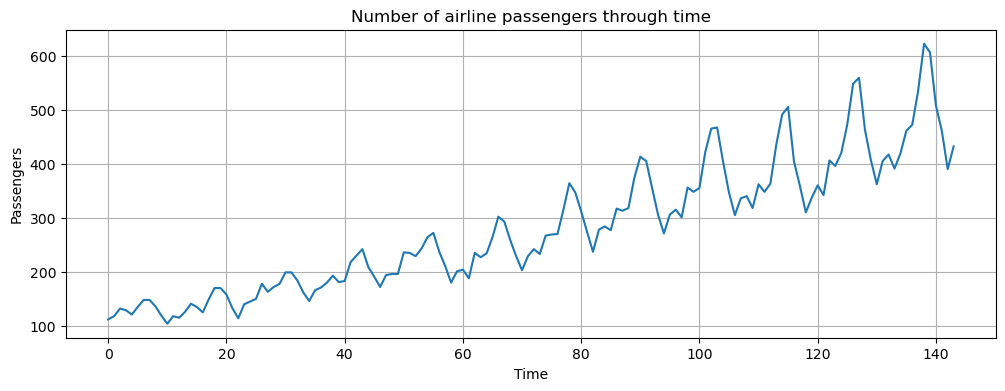

In [61]:
time = np.arange(144)
passengers = ts_A

plt.figure(figsize=(12, 4))

plt.plot(time, passengers, color='tab:blue')
plt.xlabel("Time")
plt.ylabel("Passengers")
plt.grid()
plt.title("Number of airline passengers through time");

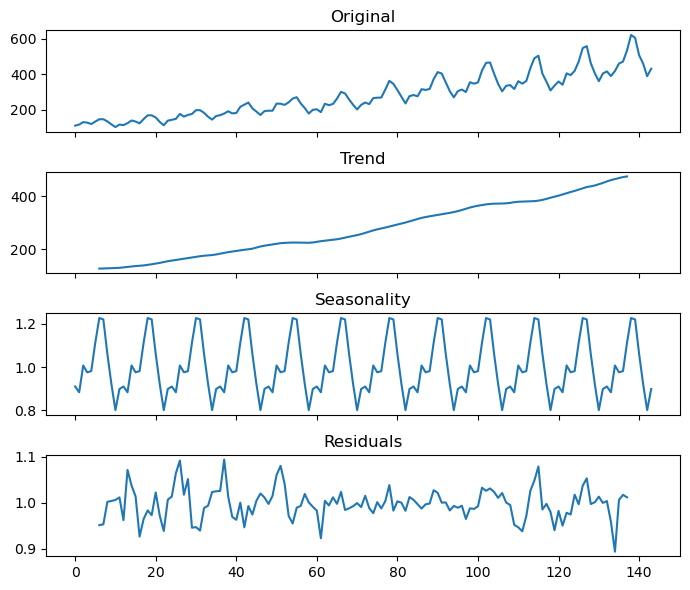

In [66]:

# decomposing the model (multiplicative)
passengers_decomp = seasonal_decompose(x=ts_A, model='multiplicative', period=12)

# A helper function to plot the original time series, and the 3 decomposed components
def seas_decomp_plots(original, decomposition):
    _, axes = plt.subplots(4, 1, sharex=True, sharey=False, figsize=(7, 6))
    axes[0].plot(original)
    axes[0].set_title('Original')
    axes[1].plot(decomposition.trend)
    axes[1].set_title('Trend')
    axes[2].plot(decomposition.seasonal)
    axes[2].set_title('Seasonality')
    axes[3].plot(decomposition.resid)
    axes[3].set_title('Residuals')
    plt.tight_layout()
    plt.show()
seas_decomp_plots(ts_A, passengers_decomp)

Text(0.5, 0, 'Time')

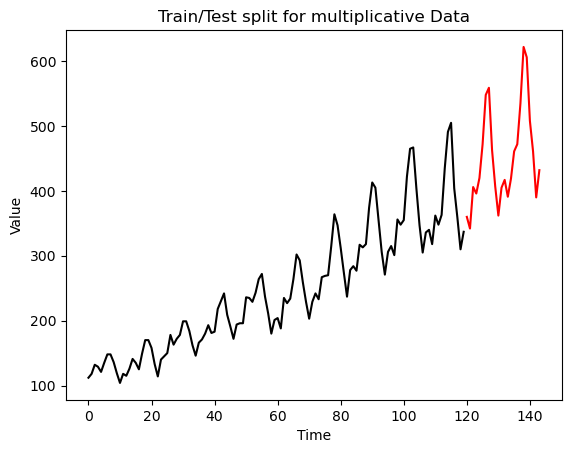

In [67]:
# We'll split at index 120, which will leave 24 timepoints to predict in the train set
split_idx = 120

# For plotting we need x-coords for the full dataset so make a list of [1, 2, .., max_x]
xs = list(range(max_x))

# Split the train data and the x-coords
train = ts_A[:split_idx]
xs_train = xs[:split_idx]

# Split the test data and the remaining x-coords
test = ts_A[split_idx:]
xs_test = xs[split_idx:]

# Plot the test and train data to see the 'truth' value of the test set
plt.plot(xs_train, train, color = "black")
plt.plot(xs_test, test, color = "red")
plt.title("Train/Test split for multiplicative Data")
plt.ylabel("Value")
plt.xlabel("Time")

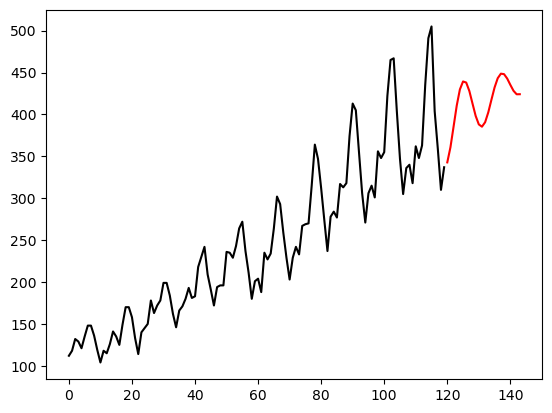

In [68]:
# Train the model on the training data
model = auto_arima(train)
model.fit(train)

# Predict the next n timepoints corresponding to the length of the test set
forecast = model.predict(n_periods=len(test))

# Plot the results
plt.plot(xs_train, train, color = "black")
plt.plot(xs_test, forecast, color = "red")

Hmm...